In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# READ MAGNITUDES AND ESTIMATES OF SKY UNCERTAINTIES AND ERRORS FROM FILE

f = 'skyErrorEstimates.txt'
data = np.genfromtxt(f)

mags = data[:, 5]
magErrs = data[:, 6:]
skySigmas = data[:, 4]

#---

ngvsIDs = np.genfromtxt(f, dtype = 'S', usecols = [0])

#---

bands = np.genfromtxt(f, dtype = 'S', usecols = [1])
#for i in range(bands.size):
#    bands[i] = bands[i].decode('UTF-8')

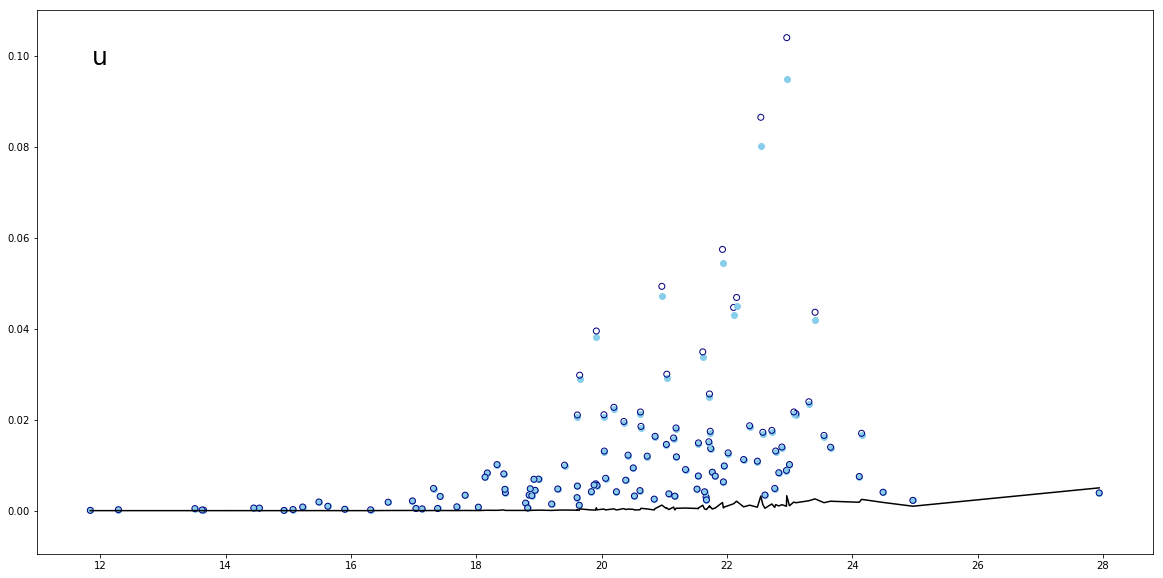

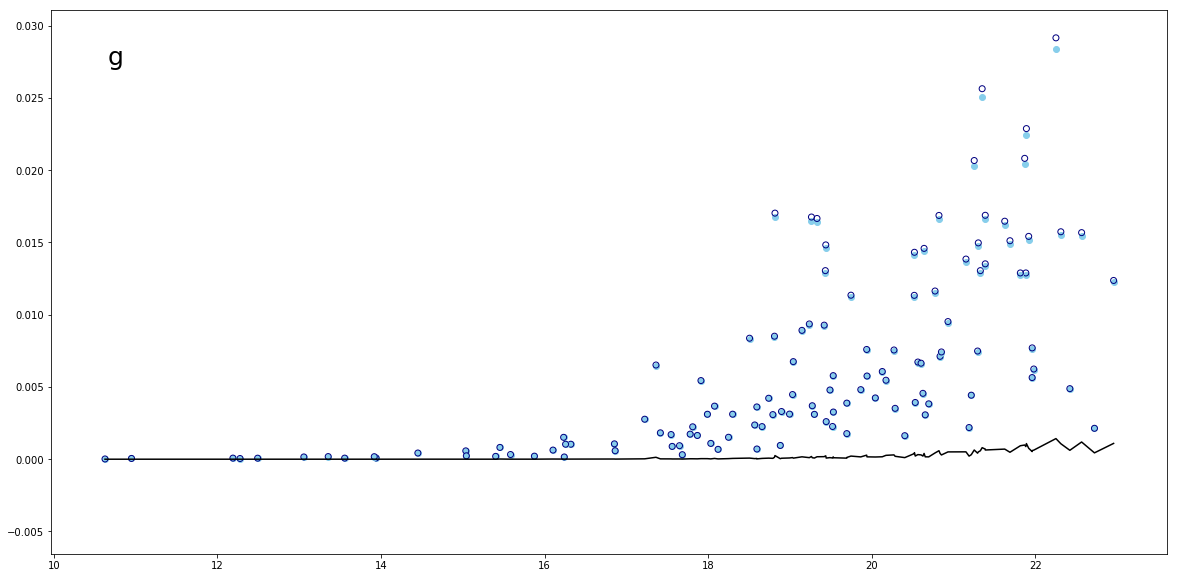

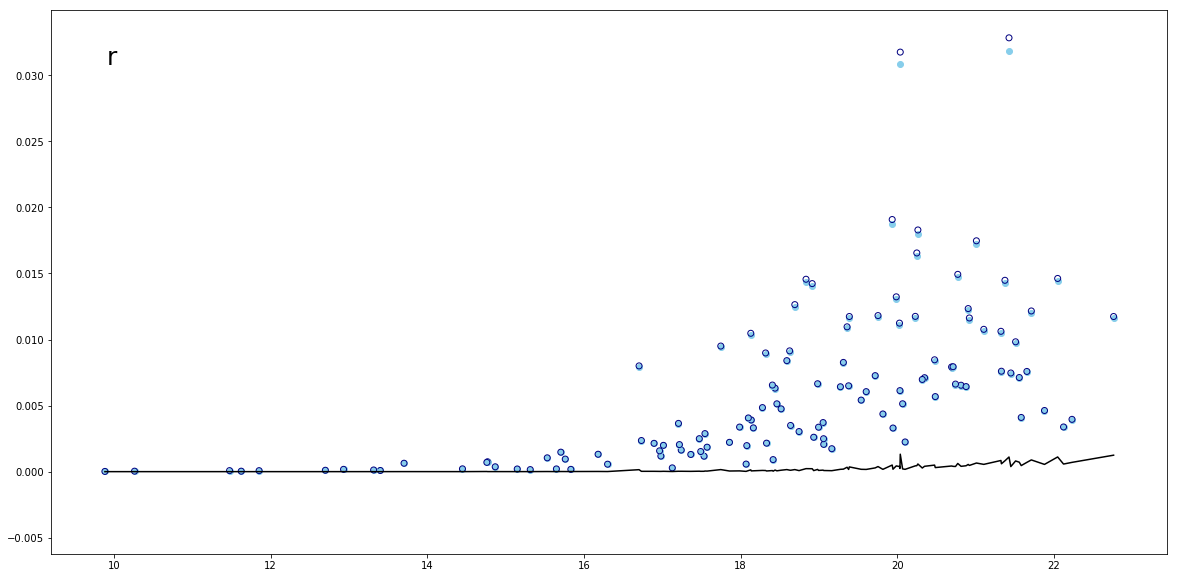

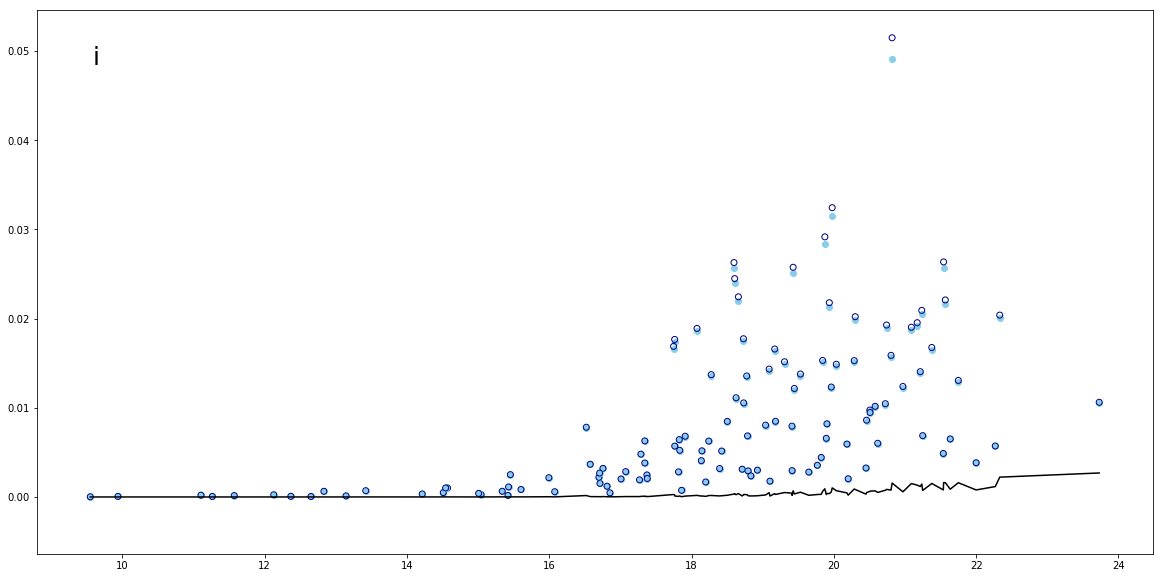

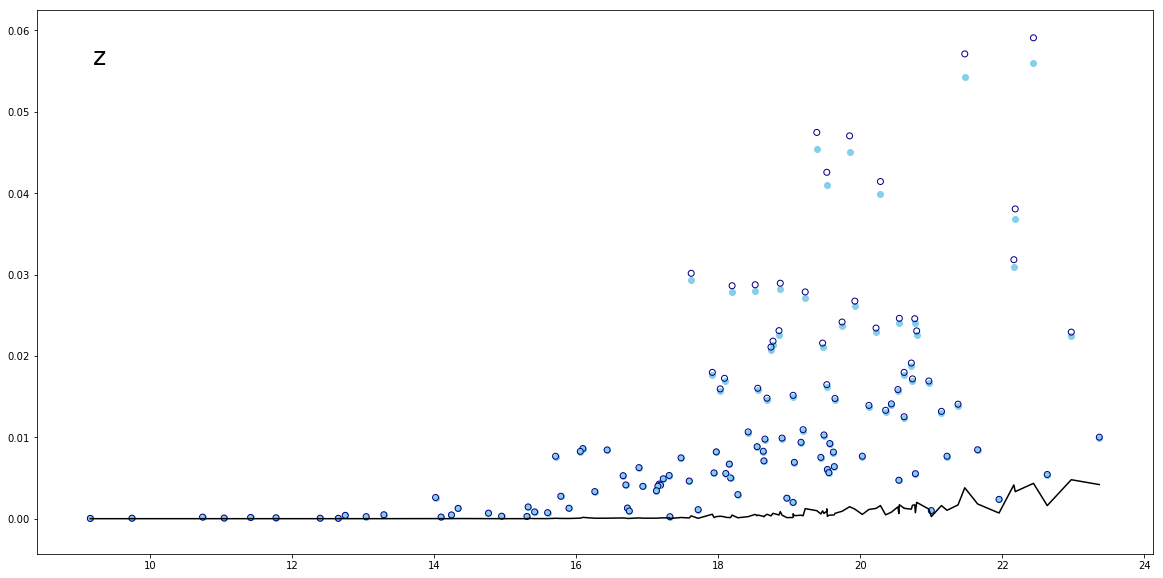

In [3]:
# cycle through bands, creating a plot of sky-subtraction errors vs mags for each one
# [note: light blue refers to case of over-subtraction, dark blue to under-subtraction]
#for band in ['U', 'G', 'R', 'I', 'Z']:
for band in [b'U', b'G', b'R', b'I', b'Z']:
    # create new plot
    fig = plt.figure(figsize = [20, 10])
    ax1 = plt.subplot(111)
    
    # cycle through magnitude array, plotting errors for chosen band
    for i, mag in enumerate(mags):
        #magBand = str(bands[i], 'utf-8')
        magBand = bands[i]
        if magBand == band:
            ax1.scatter(mag, magErrs[i, 0], c = 'skyBlue')
            ax1.scatter(mag, magErrs[i, 1], facecolor = '', edgecolor = 'navy')
            
    skySigmaTrend = np.vstack([mags[bands == band], skySigmas[bands == band]]).T
    order = skySigmaTrend[:, 0].argsort()
    ax1.plot(skySigmaTrend[order, 0], skySigmaTrend[order, 1], 'black')
    
    #yticks = ax1.get_ymajorticklabels()
    #ax1.set_yticklabels(yticks, fontsize = 10)
    
    x = ax1.get_xlim()[0] + 0.05 * (ax1.get_xlim()[1] - ax1.get_xlim()[0])
    y = ax1.get_ylim()[1] - 0.10 * (ax1.get_ylim()[1] - ax1.get_ylim()[0])
    plt.text(x, y, str(band, 'utf-8').lower(), fontsize = 25)
    
    plt.savefig('skyErrorVsMag_' + str(band, 'utf-8').lower() +'.pdf')